# week 8 Update

In [24]:
#check for outliers
joined_drop.retail

0        17.5
1        39.0
2        79.0
3        20.0
4        47.0
         ... 
98183    14.0
98184    14.0
98185    14.0
98186    14.0
98187    14.0
Name: retail, Length: 97252, dtype: float64

In [25]:
# find the outliers that are more than 3 standard deviations away from the mean
price_mean = joined_drop.retail.mean()
price_std = joined_drop.retail.std()

outliers = np.abs(joined_drop.retail - price_mean) > 3 * price_std
joined_drop.retail[outliers]

117      295.0
118      295.0
252      295.0
253      295.0
330      125.0
         ...  
97538    295.0
97970    125.0
97971    125.0
97973    125.0
97974    125.0
Name: retail, Length: 771, dtype: float64

We would use retail price to calculate the profit, although there are outliers in the retail price, but we would NOT deal with it because it is normal that Dillard sells different kind of priducts with wide range of prices. 

## continue to standardize all the scale 

### Color

In [26]:
joined_drop.color.value_counts()

color
BLACK         6829
WHITE         6407
001BLACK      1248
01-BLACK      1153
MULTI         1148
              ... 
CHARCOAL/T       1
COPER36C5        1
454BLUE/PR       1
0012871125       1
PURPLE 1         1
Name: count, Length: 6451, dtype: int64

we need to standardize colors 
before cleaning, we have 6451 different colors.

In [29]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#Drop Null value
joined_drop= joined_drop.dropna()
joined_drop.shape

(97252, 17)

In [31]:
# Define your color categories
color_categories = {
    'Black': ['BLACK', '001BLACK', '01-BLACK', 'CHARCOAL',"BLKNAPPA"],
    'White': ['WHITE', 'BEIGE',"39LOVEYDOVE",'OATMEAL'],
    'Red': ['RED', 'BURGUNDY', 'MAROON',"BEETRED","650ROUGE"],  # Add variations of red here
    'Green': ['GREEN', 'LIME', 'OLIVE',"APPLEGREE"],   # Add variations of green here
    'Yellow': ['YELLOW', 'GOLD', 'AMBER'], # Add variations of yellow here
    'Blue': ['BLUE', 'NAVY', 'CYAN',"CHAMBRAYP"],      # Add variations of blue here
    'Brown': ['BROWN', 'TAN', 'BRONZE',"ROSEWOOD"],   # Add variations of brown here
    'Orange': ['ORANGE', 'CORAL'],         # Add variations of orange here
    'Pink': ['PINK', 'FUCHSIA',"10BERRY"],           # Add variations of pink here
    'Purple': ['PURPLE', 'VIOLET'],        # Add variations of purple here
    'Grey': ['GREY', 'SILVER', 'CHARCOAL'],# Add variations of grey here
    "Silver":["Silver"],
    "Gold":["Gold"],
    "Nocolor":["Nocolor"],
    "Multi":["STONEWASH",'ASSORTED',"CLAIR"]
}

# Function to map colors to categories with improved cleaning
def map_color_to_category(color):
    # Retain significant numbers or characters as needed
    color_cleaned = ''.join(filter(lambda c: c.isalpha() or c.isdigit(), color.upper()))
    for category, color_list in color_categories.items():
        for variation in color_list:
            if variation in color_cleaned:
                return category
    return 'Other'

# Apply the mapping function to the 'color' column
joined_drop['standardized_color'] = joined_drop['color'].apply(map_color_to_category)

joined_drop.head()

,sku,store,stype,quantity,orgprice,amt,cost,retail,dept,classid,upc,style,color,size,packsize,vendor,brand,standardized_color
0,1000940,4202,P,1,17.5,17.5,8.4,17.5,2105,125,400000940100,676RKI,CHAMBRAY P,M,1,3622251,SARA LEE,Blue
1,1001212,604,R,1,39.0,39.0,18.8,39.0,8306,272,400001212100,Y J63524,BEET RED,100M,1,5616208,MERRELL/,Red
2,1001224,3807,P,1,79.0,79.0,37.0,79.0,7106,312,400001224100,E991 L-PULS,BLK NAPPA,095M,1,3816210,FRANCO S,Black
3,1002009,4103,P,1,20.0,20.0,9.0,20.0,2102,782,400002009100,8004,BLACK,36C,1,4516339,CABERNET,Black
4,1002115,9103,P,1,47.0,47.0,28.2,47.0,5100,007,400002115100,132020,CLAIR,NO SIZE,3,6041161,CHANEL I,Multi


In [32]:
#PICK SOME COLORS WE COULD PROCESS FURTHER, LEAVE THOSE WE COULD NOT RECOGNIZE
other_colors_df = joined_drop[joined_drop['standardized_color'] == "Other"]
other_colors_df

,sku,store,stype,quantity,orgprice,amt,cost,retail,dept,classid,upc,style,color,size,packsize,vendor,brand,standardized_color
12,1006384,7402,P,1,48.0,32.16,14.40,12.00,7101,002,400006384100,190031,H. BR FUSC,XL,1,6516189,REPUBLIC,Other
29,1007622,6104,P,1,6.0,4.00,1.80,3.00,1202,404,400007622100,14D028,CARNIVALSTR,S,1,313319,CABERNET,Other
35,1012961,9806,P,1,42.5,42.50,25.50,42.50,800,005,400002961101,66K4,HAPPIER 664K,*DISC,3,5511283,CLINIQUE,Other
36,1014324,9304,P,1,30.0,30.00,11.15,30.00,9105,927,400004324101,00T 1356C0,VINTAGE,36 36,1,6216217,ROUNDTRE,Other
39,1014478,2303,P,1,37.5,37.50,22.50,37.50,6400,004,400004478101,8 7002-9,SHOWER GEL,6.7,3,11679,DESIGNER,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98121,9996028,509,P,1,48.0,48.00,19.63,12.00,2301,002,400006028999,CC932,AMETHYST,M,1,8043525,KORET OF,Other
98124,9996230,7603,P,1,32.0,32.00,12.80,16.00,5404,003,400006230999,85-89 443550,DENIM MEDI,7,1,934938,KIDS HEA,Other
98125,9996269,9402,P,1,58.0,24.99,23.00,14.50,1301,004,400006269999,009H 5E-L20,MEDIUM STO,20W,1,1510974,CM SHAPE,Other
98128,9997198,2104,P,1,25.0,14.99,6.16,6.25,2107,001,400007198999,0 427H15,CLEAR,ALL,4,7149207,MAIN ING,Other


In [33]:
joined_drop.standardized_color.value_counts()

standardized_color
Other     58654
Black     13128
White     10084
Blue       4209
Brown      2368
Red        2177
Grey       1679
Pink       1625
Yellow     1122
Multi      1094
Green       620
Purple      275
Orange      217
Name: count, dtype: int64

In [34]:
len(joined_drop.standardized_color.value_counts())

13

Now, we only have 13 different colors 

In [35]:
#no need to deal with
joined_drop.brand.value_counts()

brand
CLINIQUE    20388
LANCOME      9398
CABERNET     6482
LIZ CLAI     3208
MILCO IN     2057
            ...  
SCULLY          1
REVMAN I        1
DR. LUCK        1
LEARNING        1
J. MARCU        1
Name: count, Length: 542, dtype: int64

In [36]:
#no need to deal with
joined_drop.vendor.value_counts()

vendor
5511283    20388
113645      9398
13031       3266
3626213     2107
2012863     1774
           ...  
7413322        1
5613319        1
3516185        1
5413317        1
7149207        1
Name: count, Length: 717, dtype: int64

In [37]:
#FIND WHAT COLORS CUSTOMERS LIKE TO BUY MOST/ THE COLORS WITH HIGHEST SALES REVENUE


### Size

In [38]:
joined_drop["size"].value_counts()

size
ALL           15174
M              3853
L              3804
NO SIZE        3542
XL             2284
              ...  
MUG/SUNFLR        1
SMOOTHFACE        1
S/6PLT/TRA        1
OVL BAKER         1
TRTMT             1
Name: count, Length: 1501, dtype: int64

Before cleaning the size category, we have 1501 types of sizes.

In [42]:
joined_drop['size'].apply(lambda x: not str(x).isnumeric())

0        True
1        True
2        True
3        True
4        True
         ... 
98183    True
98184    True
98185    True
98186    True
98187    True
Name: size, Length: 97252, dtype: bool

All are not numerical size.

In [56]:
# Count the occurrences of each value in the "size" column
size_counts = joined_drop["size"].value_counts()

# Get the values that appear less than 300
values_to_drop = size_counts[size_counts < 300].index

# Drop rows where "size" is in values_to_drop
joined_drop = joined_drop[~joined_drop["size"].isin(values_to_drop)]

In [57]:
joined_drop["size"].value_counts()

size
ALL           15174
M              3853
L              3804
NO SIZE        3542
XL             2284
7              2032
S              1623
*DISC          1502
6              1357
ONE            1216
9              1118
QUICK EYE      1112
8              1107
5              1078
BATH            990
HAND            968
STAY MATTE      962
4.2 OZ          921
01-BLACK        915
DUAL FINIS      746
SUPERBAL        730
WASH            678
CS EYE          632
1               608
080M            596
SUPERFIT        594
CITY BASE       591
085M            571
10              542
5PPS PLC S      541
3               512
075M            466
DISC            435
100M            433
090M            429
1.7 OZ          427
LL SHINE        408
SUPERPOWDE      406
COMPACT         377
2               375
12              375
11              368
H IMPACT        367
3.4 OZ          363
XXL             351
36C             334
095M            328
36              323
LIP DIFFER      321
MAKEUP         

In [58]:
# Define your color categories
size_categories = {
    '4XS': ['XXXXS','0', '00', '1'],        
    '3XS': ['XXXS','2', '3',"4"],      
    '2XS': ['XXS','6', '7', '8'],    
    'XS': ['XS', '10', '11','12'],
    'S': ['S','14', '15','16'],
    'M': ['M','18', '19','20'],
    'L': ['L','22','23','24'],  
    'XL': ['XL','26','27','28'], 
    '2XL': ['XXL','30', '31', '32'],
    '3XL': ['XXXL','34', '35','36'],  
    '4XL': ['XXXXL','38', '39', '40'], 
    'ALL': ['ALL'],
    'NOSIZE': ['NO SIZE']
}

# Function to map colors to categories with improved cleaning
def map_size_to_category(size):
    # Retain significant numbers or characters as needed
    size_cleaned = ''.join(filter(lambda c: c.isalpha() or c.isdigit(), size.upper()))
    for category, size_list in size_categories.items():
        for variation in size_list:
            if variation in size_cleaned:
                return category
    return 'Other'

# Apply the mapping function to the 'color' column
joined_drop['standardized_size'] = joined_drop['size'].apply(map_size_to_category)

joined_drop.head()


/var/folders/cl/n5df_r612yn353g55xtfs5tm0000gn/T/ipykernel_12459/1303699351.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_drop['standardized_size'] = joined_drop['size'].apply(map_size_to_category)


,sku,store,stype,quantity,orgprice,amt,cost,retail,dept,classid,upc,style,color,size,packsize,vendor,brand,standardized_color,standardized_size
0,1000940,4202,P,1,17.5,17.5,8.4,17.5,2105,125,400000940100,676RKI,CHAMBRAY P,M,1,3622251,SARA LEE,Blue,M
1,1001212,604,R,1,39.0,39.0,18.8,39.0,8306,272,400001212100,Y J63524,BEET RED,100M,1,5616208,MERRELL/,Red,4XS
2,1001224,3807,P,1,79.0,79.0,37.0,79.0,7106,312,400001224100,E991 L-PULS,BLK NAPPA,095M,1,3816210,FRANCO S,Black,4XS
3,1002009,4103,P,1,20.0,20.0,9.0,20.0,2102,782,400002009100,8004,BLACK,36C,1,4516339,CABERNET,Black,3XS
4,1002115,9103,P,1,47.0,47.0,28.2,47.0,5100,007,400002115100,132020,CLAIR,NO SIZE,3,6041161,CHANEL I,Multi,S


In [59]:
joined_drop["standardized_size"].value_counts()

standardized_size
L        22235
S        13390
Other     6482
4XS       6361
M         4910
2XS       4496
3XS       3443
Name: count, dtype: int64

In [60]:
len(joined_drop_size_filtered.standardized_size.value_counts())

7

### Style

In [62]:
joined_drop["style"].value_counts()

style
62A4            1112
645J             962
2410             915
2228             746
60QH             730
                ... 
59    F35QX2       1
3GRY  70602-       1
6005  PM1816       1
74572              1
CA7HKUR202AC       1
Name: count, Length: 10409, dtype: int64

In [65]:
joined_drop["style"] = joined_drop["style"].str.replace(r'[^a-zA-Z0-9]', '', regex=True)

# Now, you can check the updated value counts
print(joined_drop["style"].value_counts())

style
62A4            1112
645J             962
2410             915
2228             746
60QH             730
                ... 
59F35QX2           1
3GRY70602          1
6005PM1816         1
74572              1
CA7HKUR202AC       1
Name: count, Length: 10409, dtype: int64


/var/folders/cl/n5df_r612yn353g55xtfs5tm0000gn/T/ipykernel_12459/2445732552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_drop["style"] = joined_drop["style"].str.replace(r'[^a-zA-Z0-9]', '', regex=True)


<Axes: >

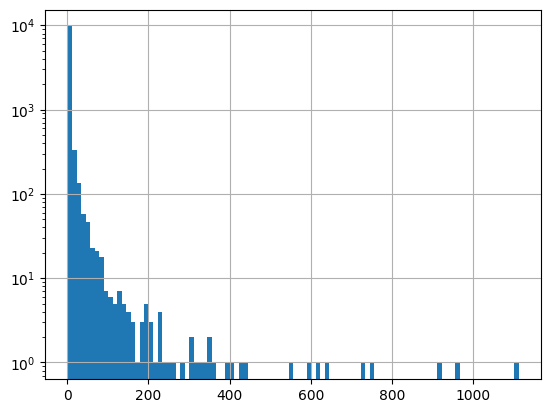

In [66]:
joined_drop["style"].value_counts().hist(bins=100, log=True)

Text(0.5, 1.0, 'Box Plot of Style Counts')

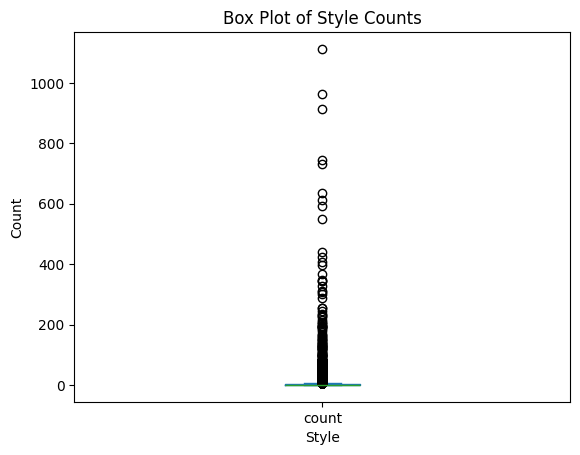

In [67]:
joined_drop["style"].value_counts().plot(kind='box')
plt.xlabel('Style')
plt.ylabel('Count')
plt.title('Box Plot of Style Counts')

We can see that most of the style counts shows a strong right skew. With our primary interesting in detecting the most charateristics of the most popular items, we are going to set a limit c, and drop those style with counts below this limit.

We can see that most of the style counts shows a strong right skew. With our primary interesting in detecting the most charateristics of the most popular items, we are going to set a limit c, and drop those style with counts below this limit.

#### c = 100

In [68]:
style_counts = joined_drop.groupby("style").size().reset_index(name='count')

# Filter out style groups with count less than 1
valid_styles = style_counts[style_counts['count'] > 100]['style']

# Filter the original DataFrame based on valid_styles
joined_drop = joined_drop[joined_drop['style'].isin(valid_styles)]

# Display the result
joined_drop["style"].value_counts()


style
62A4           1112
645J            962
2410            915
2228            746
60QH            730
               ... 
74052EBTH04     109
269115180       108
R315            104
3543            104
546115185       101
Name: count, Length: 72, dtype: int64

<Axes: >

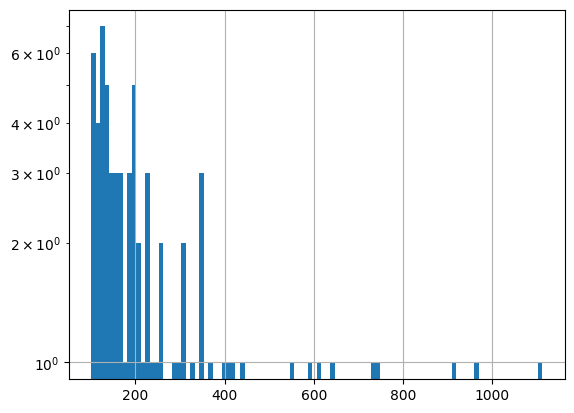

In [69]:
joined_drop["style"].value_counts().hist(bins=100, log=True)

Text(0.5, 1.0, 'Box Plot of Style Counts')

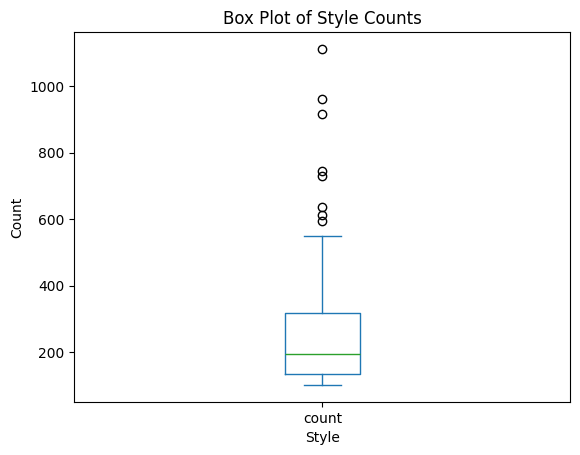

In [70]:
joined_drop["style"].value_counts().plot(kind='box')
plt.xlabel('Style')
plt.ylabel('Count')
plt.title('Box Plot of Style Counts')

In [71]:
joined_drop.shape

(19613, 19)